In [85]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

## Importamos el set de datos de flor Iris

In [2]:
# Cargar el conjunto de datos Iris
iris = load_iris()

In [54]:
#Definimos las variables x e y
x = iris.data
y = iris.target

In [4]:
data = np.column_stack((x,y)) #Juntar dos arreglos de numpy como columnas 

In [5]:
names = ['Sepal.lenght', 'Sepal.width', 'Pepal.lenght', 'Petal.lenght', 'class']

## Creamos un dataframe con las variables 

In [6]:
df = pd.DataFrame(data=data, columns=names)

In [7]:
df.head()

,Sepal.lenght,Sepal.width,Pepal.lenght,Petal.lenght,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Verificamos el tamaño del data frame

In [55]:
df.shape

(150, 5)

Nuestro DataFrame contiene 150 filas con 5 columnas

In [57]:
X = df.drop(columns=['class'], axis=1)
y = df[['class']]

In [9]:
a = list(X.columns)
a

['Sepal.lenght', 'Sepal.width', 'Pepal.lenght', 'Petal.lenght']

In [10]:
def density_plot(data: pd):
    data.plot(kind='density', subplots=True, layout=(3,3),sharex=False, figsize = (20,20))
    plt.show()

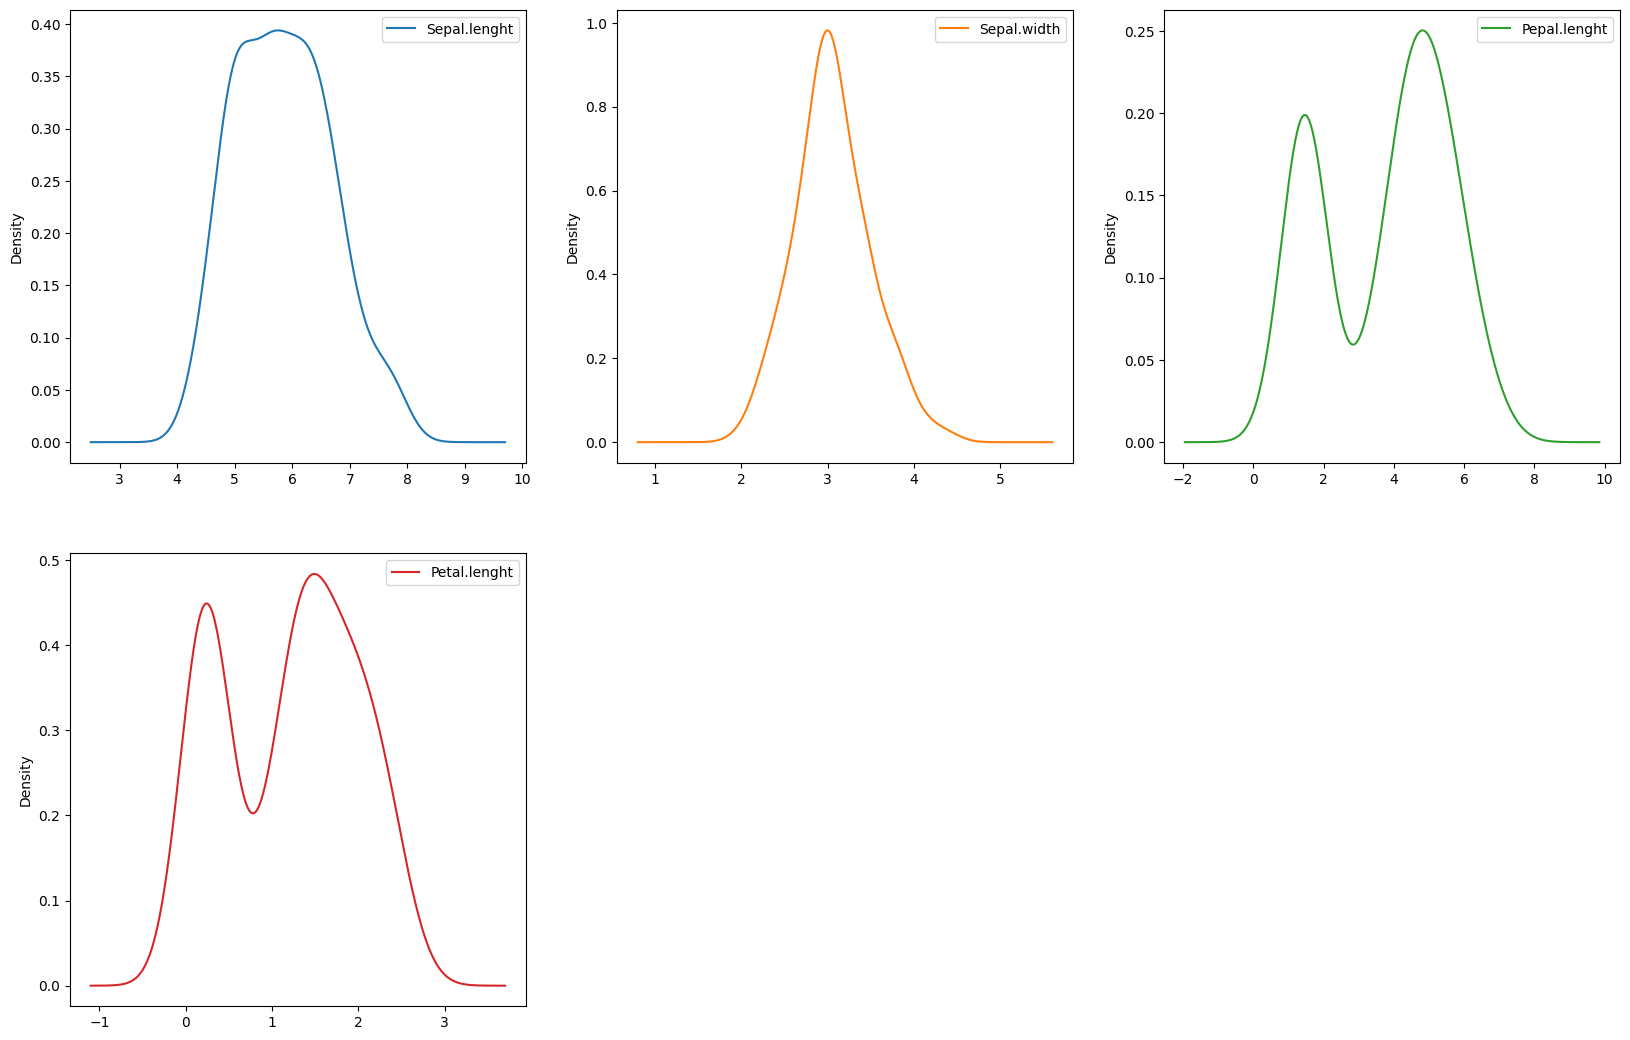

In [56]:
density_plot(X)

En las graficas de densidad podemos observar que 'Sepal.lenght' y 'Sepal.width' siguen una distribución muy parecido a una Gaussiana, lo cual puede ser benefico para muchos modelos de ML, mientras 'Pepal.lenght' y 'Petal.lenght' tienen valores atipicos, lo cual causa una doble campana en la distribución.

In [12]:
def box_plot_multi(x, y, data):
    x_columns = list(x.columns)  # Obtener los nombres de las columnas de x
    y = list(y.columns)
    fig, axes = plt.subplots(len(x_columns), 1, figsize=(8, len(x_columns) * 4))  # Crear subplots en una columna
    for i, col in enumerate(x_columns):
        sns.boxplot(x=y[0], y=col, data=data, ax=axes[i], hue=y[0],palette='Set2' )  # Crear el gráfico de caja en cada subplot
    plt.tight_layout()
    plt.show()

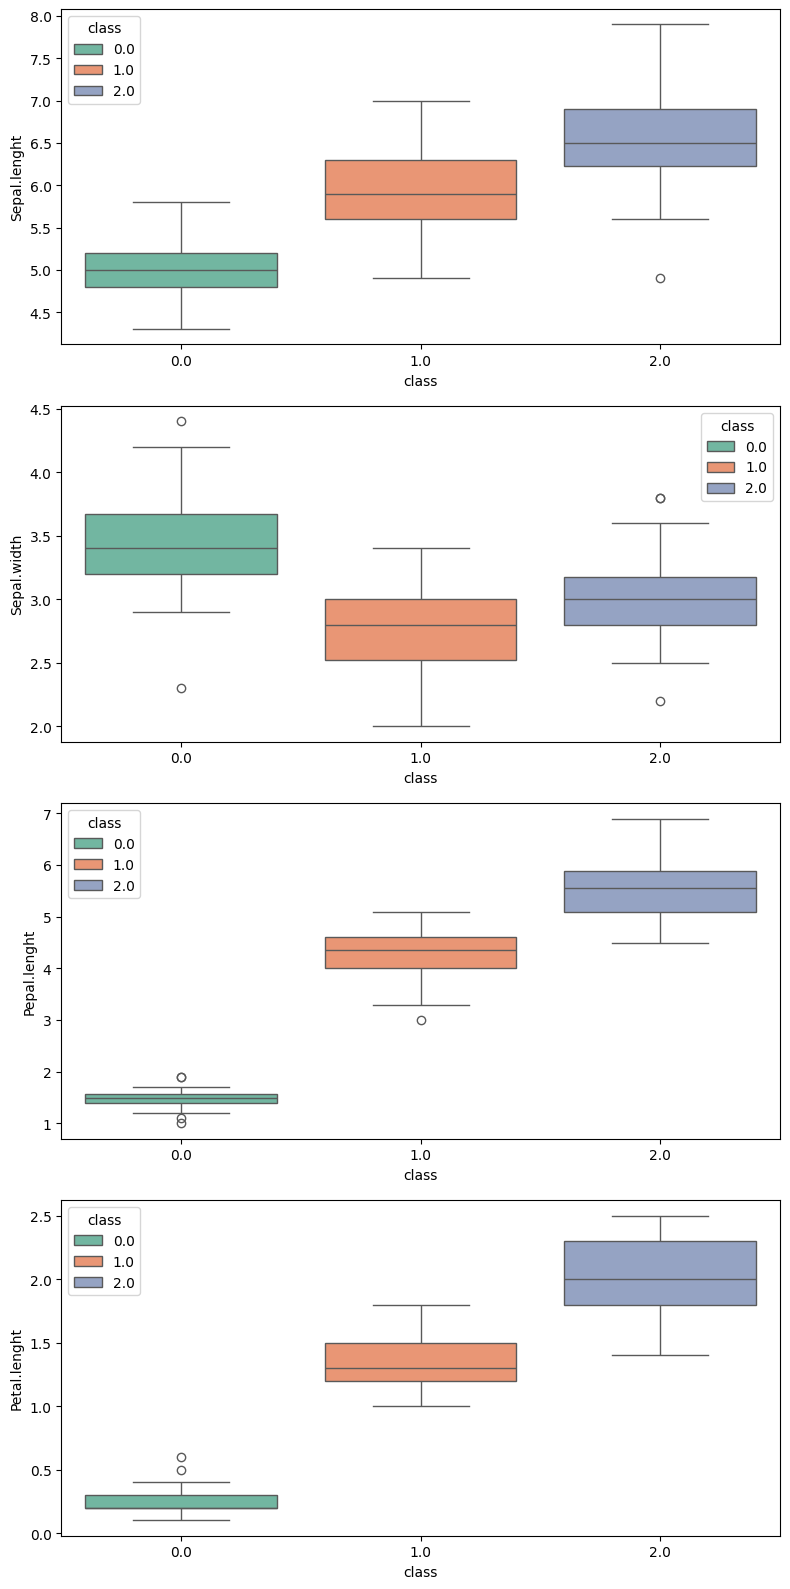

In [13]:
box_plot_multi(x=X, y=y, data=df)

Al comparar las características con las clases, se observa que 'Sepal.length', 'Petal.length' y 'Petal.width' son características altamente relevantes, ya que permiten una separación clara entre las clases. En contraste, 'Sepal.width' no resulta ser una característica tan significativa, dado que no contribuye de manera efectiva a la diferenciación de las clases.

In [22]:
def class_distribution(y, target_column=None):
    # Verificar si 'y' es un DataFrame y si se especifica una columna objetivo
    if isinstance(y, pd.DataFrame):
        if target_column:
            # Si se pasa el nombre de la columna, usarla
            y = y[target_column]
        else:
            # Si no se pasa el nombre, intentar con una columna si solo hay una
            if len(y.columns) == 1:
                y = y.iloc[:, 0]
            else:
                raise ValueError("Debe especificar 'target_column' cuando el DataFrame tiene más de una columna.")
    
    # Crear la figura y ajustar el tamaño
    plt.figure(figsize=(8, 6))
    
    # Usar countplot para distribución de clases categóricas
    sns.countplot(x=y)
    
    # Agregar título y etiquetas
    plt.title('Distribución de Clases', fontsize=16)
    plt.xlabel('Clase', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

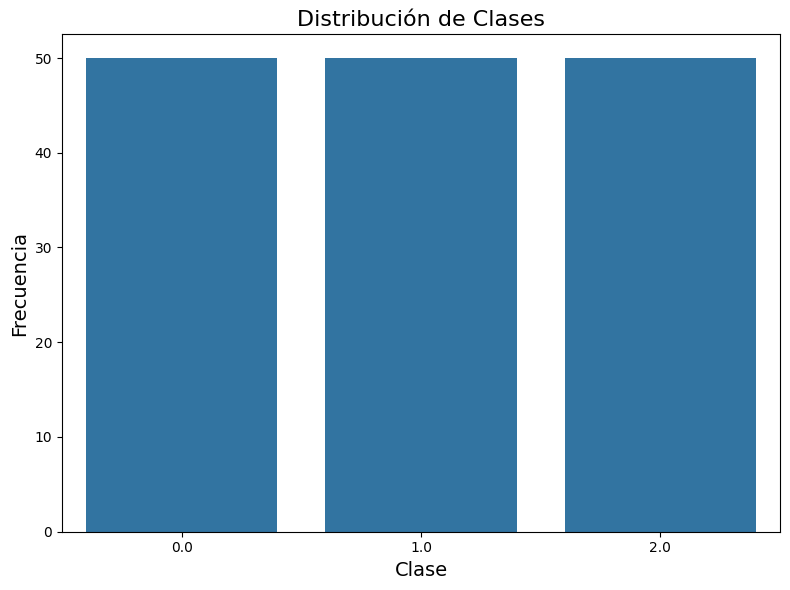

In [23]:
class_distribution(y)

Todas las clases de encuentran perfectamente balanceadas lo cual es imporante para nuestro modelo

In [49]:
def displot_numeric(x: list, df: pd.DataFrame):
    n_columns = 4  # Número de columnas por fila
    total = len(x)  # Número total de columnas en el DataFrame
    # Calcular el número de filas necesario
    n_rows = (total + n_columns - 1) // n_columns
    
    # Aumentar el tamaño de la figura
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, n_rows * 4))
    
    # Asegurarnos de aplanar la cuadrícula para iterar fácilmente sobre ella
    axes = axes.flatten()
    
    # Graficar cada variable numérica
    for i, col in enumerate(x):
        sns.histplot(data=df, x=col, ax=axes[i], kde=True)  # Agregar KDE para suavizado opcional
        axes[i].set_title(f'Displot of {col}', fontsize=12)  # Ajustar tamaño del título
        axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X si es necesario
    
    # Eliminar los subplots vacíos si hay menos gráficos que espacios en la cuadrícula
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar automáticamente el espacio entre subplots
    plt.tight_layout()
    plt.show()

    
def PlotCatVtarget(x: list, df: pd.DataFrame, target: str):
    n_columns = 4  # Número de columnas por fila
    total = len(x)  # Número total de variables categóricas
    # Calcular el número de filas necesario
    n_rows = (total + n_columns - 1) // n_columns
    # Aumentar el tamaño de la figura para que los gráficos no estén tan apretados
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 10))
    
    # Asegurarnos de aplanar la cuadrícula para iterar fácilmente sobre ella
    axes = axes.flatten()
    
    # Graficar cada variable categórica contra la variable objetivo
    for i, col in enumerate(x):
        sns.boxplot(data=df, x=col, y=target, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col} vs {target}')
        axes[i].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje x individualmente

    # Eliminar los subplots vacíos si hay menos gráficos que espacios en la cuadrícula
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar el espacio entre los subplots
    plt.show()
    

def PlotPairPlotNumTarget(x_num, df: pd.DataFrame, target: str):
    # Asegurarse de que x_num sea una lista de nombres de columnas
    if isinstance(x_num, pd.DataFrame):  # Si es un DataFrame, extraer las columnas
        x_num = x_num.columns.tolist()
    elif isinstance(x_num, pd.Index):  # Si es un Index, convertirlo a lista
        x_num = x_num.tolist()
    
    # Asegurarse de que target esté incluido en x_num si no lo está
    if target not in x_num:
        x_num = x_num + [target]
    
    # Seleccionar solo las columnas numéricas del DataFrame
    data_numeric = df[x_num].select_dtypes(include=['float64', 'int64'])
    
    # Crear el pairplot usando seaborn
    sns.pairplot(data_numeric, diag_kind='kde')  # 'kde' para gráficos de densidad
    plt.show()
    
def corr_matriz(df):
    # Seleccionar solo las columnas numéricas del DataFrame
    df_numeric = df.select_dtypes(include=['float64', 'int64'])

    # Calcular la matriz de correlación
    correlation = df_numeric.corr()

    # Graficar la matriz de correlación
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
    plt.title('Correlation Matrix')
    plt.show()

In [34]:
#Obtener el tipo de variables 
df.dtypes

Sepal.lenght    float64
Sepal.width     float64
Pepal.lenght    float64
Petal.lenght    float64
class           float64
dtype: object

Todas las variables son de tipo numerico al igual que la clase

In [35]:
#Solo tenemos variables numericas 
numerical_columns = df.select_dtypes(include=['number']).columns

In [44]:
x_num = df[numerical_columns].drop(columns=['class'])

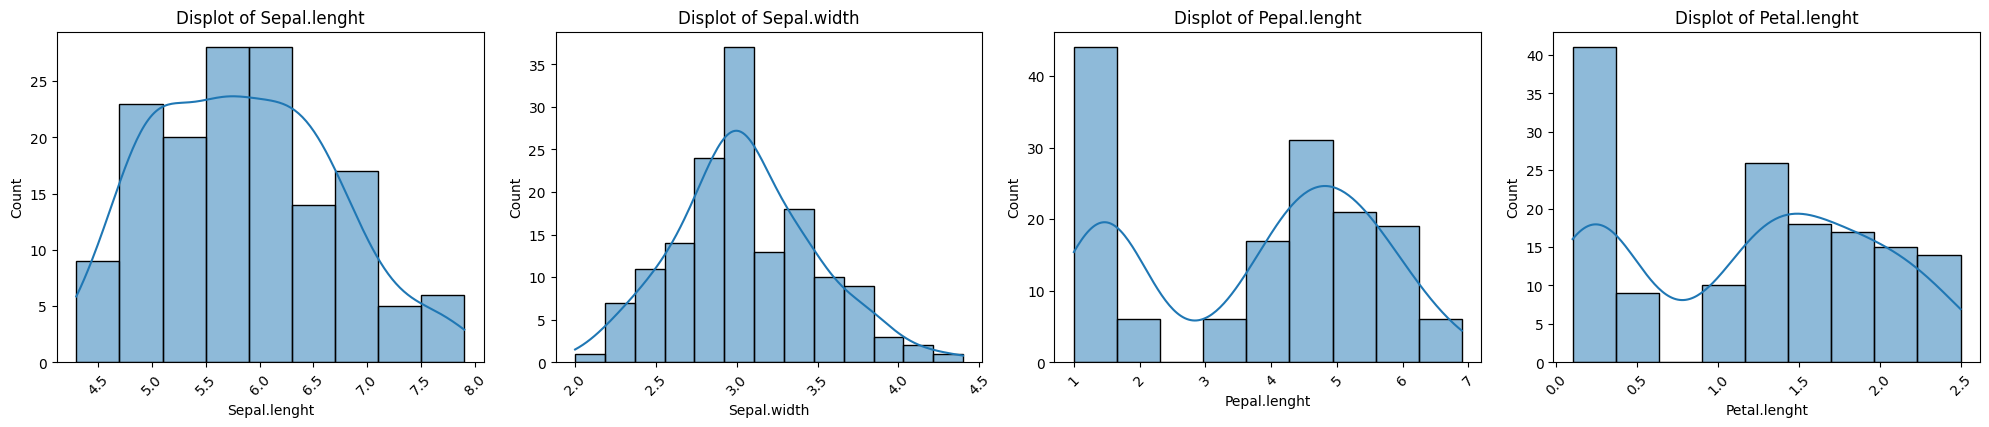

In [45]:
displot_numeric(x_num, df)

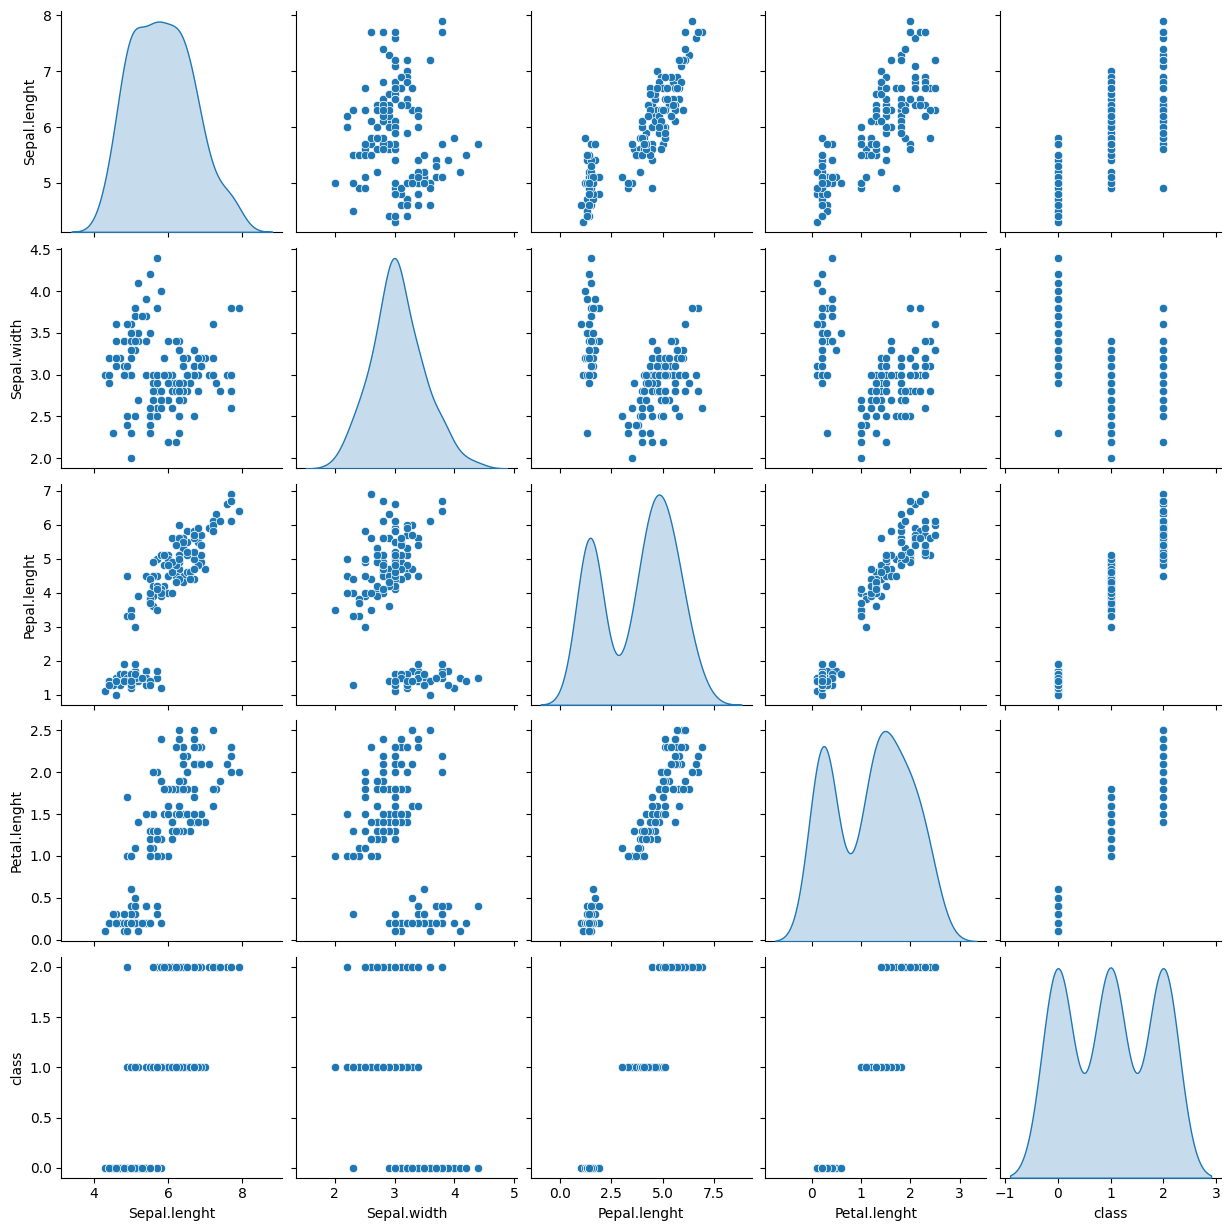

In [50]:
PlotPairPlotNumTarget(x_num, df, target='class')

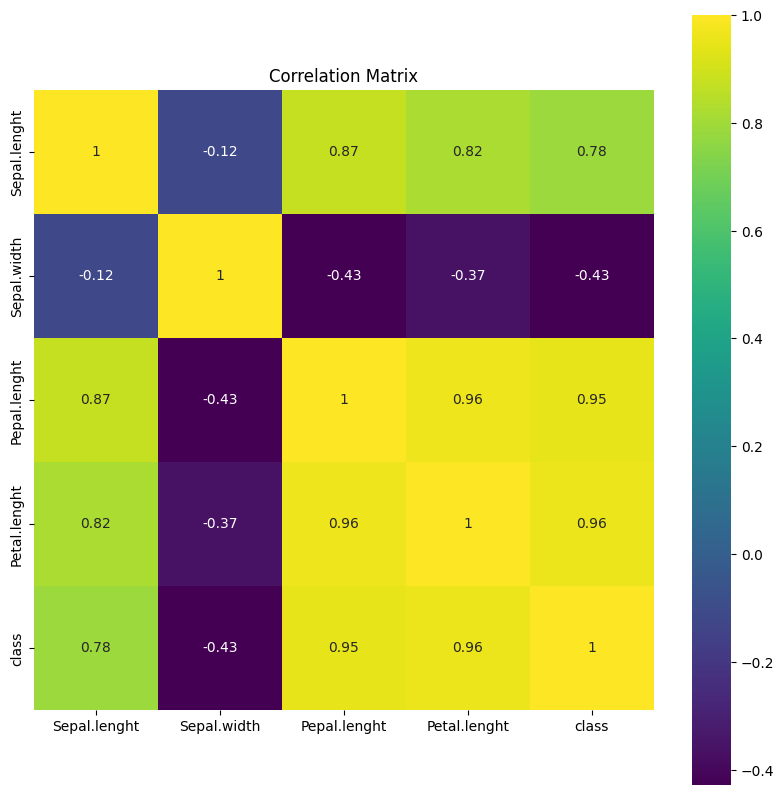

In [33]:
corr_matriz(df)

In [74]:
X = X ##Usamos todas las variables dentro del set de datos
y = np.squeeze(y)

## Separar los datos para el entrenamiento

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print(f'Total de datos de entrenamiento {X_train.shape[0]}')
print(f'Total de datos para validacion: {X_val.shape[0]}')

Total de datos de entrenamiento 120
Total de datos para validacion: 30


## Cargar y entrenar el modelo con Regresión logistica

In [71]:
#Creamos una instancia del modelo
model = LogisticRegression()

In [72]:
#Entrenamos el modelo
model.fit(X_train, y_train)

LogisticRegression()

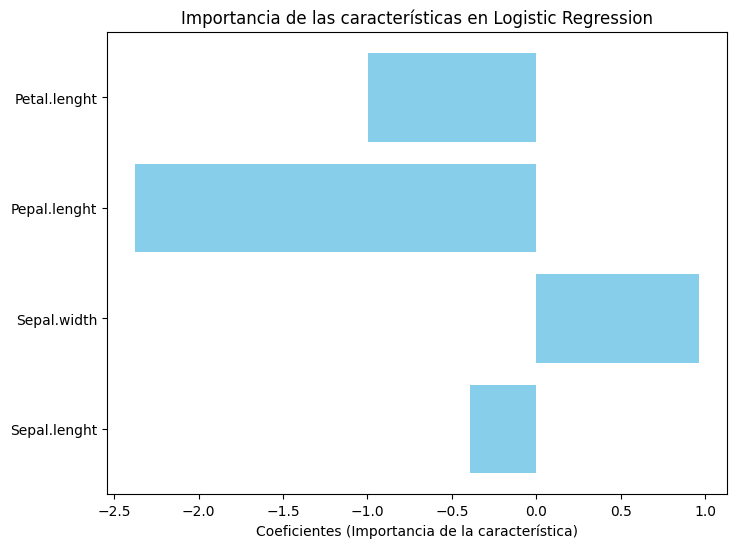

In [84]:
# Obtener los coeficientes de las características
coefficients = model.coef_[0]  # Para modelos multiclase, accedemos a una clase específica
feature_names = list(X)
# Mostrar los coeficientes (importancia de características)
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel("Coeficientes (Importancia de la característica)")
plt.title("Importancia de las características en Logistic Regression")
plt.show()

In [73]:
#Realizar predicciones
y_hat = model.predict(X_val)

In [76]:
# Calcular el accuracy
accuracy = accuracy_score(y_val, y_hat)
print(f'Exactitud final del modelo: {accuracy}')

Exactitud final del modelo: 1.0


In [79]:
#Obtener un reporte detallado del modelo
print(classification_report(y_val, y_hat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



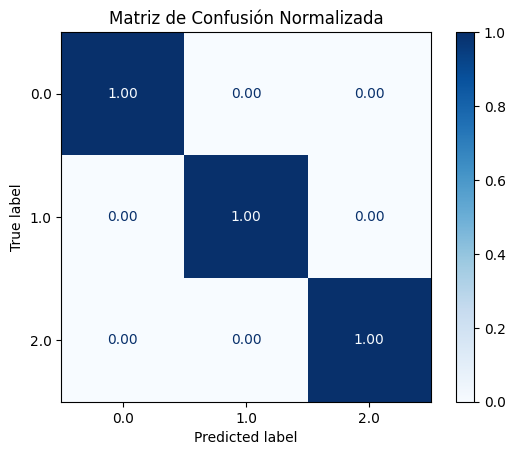

In [82]:
conf_matrix = confusion_matrix(y_val, y_hat, normalize='true')  # Valores normalizados por filas

# Visualizar la Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Formato decimal para los valores
plt.title("Matriz de Confusión Normalizada")
plt.show()

El modelo fue perfecto predicioendo todas las clases, por lo cual no hay necesidad de realizar una selección de caracteristicas

## Entrnando un modelo con RandomForest

### RandomForest es un modelo basado en ensables de árboles de decisión 

In [86]:
# Definir el modelo
rf_model = RandomForestClassifier(
    n_estimators=300,      # Número de árboles en el bosque
    max_depth=None,        # Profundidad máxima de los árboles
    random_state=42,       # Semilla para reproducibilidad
    n_jobs=-1              # Utilizar todos los núcleos disponibles
)

In [87]:
# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [88]:
# Predicciones en el conjunto de validación
y_pred = rf_model.predict(X_val)

In [89]:
# Exactitud
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

Exactitud del modelo: 1.0000


In [90]:
# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_val, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## RandomForest nos permite ver la importancia de las caracteristicas de forma muy detallada 

In [92]:
# Obtener las importancias
importances = rf_model.feature_importances_

# Crear un DataFrame para organizar las importancias
feature_names = X.columns
importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': importances
})

# Ordenar por importancia descendente
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las Características:")
print(importance_df)

Importancia de las Características:
  Característica  Importancia
2   Pepal.lenght     0.455984
3   Petal.lenght     0.408238
0   Sepal.lenght     0.103818
1    Sepal.width     0.031961


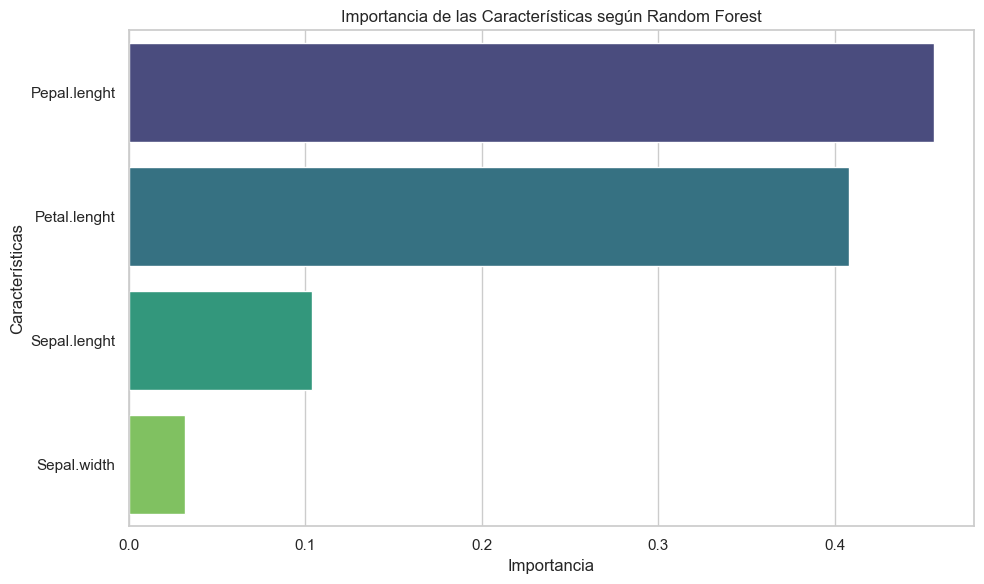

In [97]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importance_df, palette='viridis', hue='Característica', legend=False)

# Añadir etiquetas y título
plt.title('Importancia de las Características según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Las características más importantes para el modelo resultaron ser Petal.length y Pepal.length, mientras que Sepal.width mostró ser poco relevante. Por esta razón, se podría considerar su eliminación sin que el modelo pierda significativamente su desempeño, dado que el accuracy ya es cercano a 1. Sin embargo, debido a que el modelo alcanza una precisión perfecta, no es necesario realizar un proceso de selección de características.

#### Cabe destacar que la importancia de las características obtenida mediante Random Forest coincide con lo observado previamente en los gráficos BoxPlot.